<a href="https://colab.research.google.com/github/yeesem/Soft-Computing/blob/main/Tutorial_4_Extreme_Learning_Machine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Exercise:

*   Choose a different dataset.
*   Rerun the experiment for different numbers of membership functions (***num_mf***), fuzzy rules (***num_rules***), and seed number (***np.random.seed(X)***)
*   Report the results for all the configurations you have tried.
*   Extract the fuzzy rules from the best configuration.

NOTE: the above example code to extract the fuzzy rules is based on a 2-membership system. If you are using more membership functions, modify the code.

Examples of linguistic labels:

2 MF: ["Low", "High"]

3 MF: ["Low", "Medium", "High"]

5 MF: ["VeryLow", "Low", "Medium", "High", "VeryHigh"]

Advantages: very fast, can generate and test many rule-bases in a short time; rule-base is highly interpretable.

Disadvantages: random initialization of rule base; requires large memory if dataset has many features, or using many fuzzy rules and membership functions; pseudo-inverse operation may not produce good outcome; no learning.

In [18]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import LabelBinarizer,StandardScaler
from sklearn.model_selection import train_test_split
import numpy as np
import random
from tqdm import tqdm

In [19]:
np.random.seed(0)

In [20]:
data = load_iris()
X = data.data
y = data.target

#Normalize input
# scaler = StandardScaler()
# X = scaler.fit_transform(X)
for col in range(X.shape[1]):
  X[:,col] -= np.min(X[:,col])
  X[:,col] /= np.max(X[:,col])

num_feat = X.shape[1]
num_class = len(np.unique(y))

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 0)

y_bin = LabelBinarizer().fit_transform(y_train)

In [55]:
#Define a fuzzy system

num_mf = 3 # Num of fuzzy membership functions, if == 3, low.mid.high
num_rules = 30 # Num of fuzzy rules

mf_radius = 1 / (num_mf - 1)
m_centroids = np.zeros((num_mf,num_feat))
for i in range(num_mf):
  m_centroids[i] = i * mf_radius

print(m_centroids)

[[0.  0.  0.  0. ]
 [0.5 0.5 0.5 0.5]
 [1.  1.  1.  1. ]]


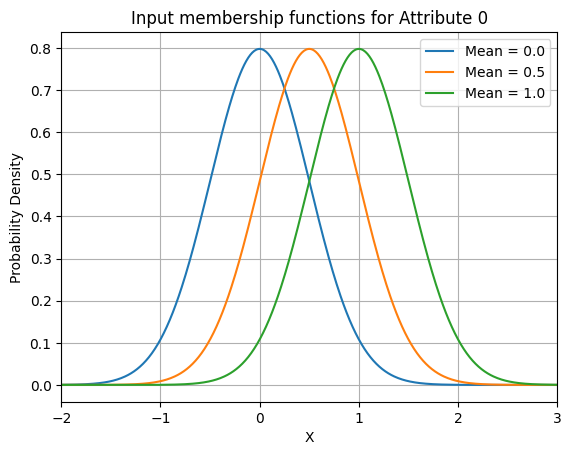

In [22]:
#Plotting the Gaussian curve for Attribute 0
def gaussian(x,mean,std_dev):
   return (1 / (std_dev * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x - mean) / std_dev) ** 2)

x_example = np.linspace(-5,5,1000)
for mean in m_centroids[:,0]:
  y_example = gaussian(x_example,mean,mf_radius)
  plt.plot(x_example,y_example,label = f"Mean = {mean}")

plt.xlabel('X')
plt.xlim(-2,3)
plt.ylabel('Probability Density')
plt.title("Input membership functions for Attribute 0")
plt.legend()
plt.grid(True)
plt.show()

In [23]:
#[number of fuzzy rules] x [number of input features] x [number of input membership functions]

# First row - feature 1, second row - feature 2,n row - feature n
#[1. 0. 1.] - If F1 is Low or High
#[0. 1. 1.] - If F2 is Medium or High
#[1. 1. 1.] - If F3 is Low or Medium or High [Any Value]

m_rule = np.round(np.random.rand(num_rules,num_feat,num_mf))

current_rule = m_rule[0]
print(current_rule)

[[1. 1. 1.]
 [1. 0. 1.]
 [0. 1. 1.]
 [0. 1. 1.]]


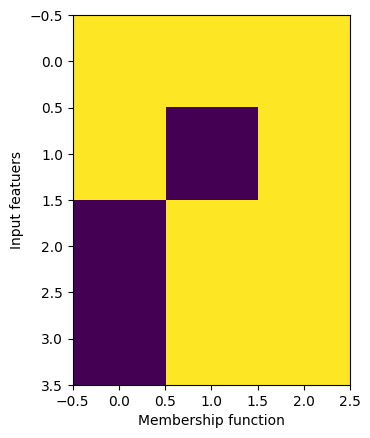

In [24]:
#Visualize the first fuzzy rule
plt.figure()
plt.xlabel("Membership function")
plt.ylabel("Input featuers")
plt.imshow(current_rule)

In [25]:
# Initialize a fuzzy rule exclusion matrix
# [number of fuzzy rules] * [number of features]
m_exclusion = np.round(np.random.rand(num_rules,num_feat))

current_rule = m_exclusion[0]
print(current_rule)

# [1. 1. 1. 1.] # all features are included
# 0 indicates exclude the feature, while 1 includes the feature in the fuzzy rule

[1. 1. 1. 1.]


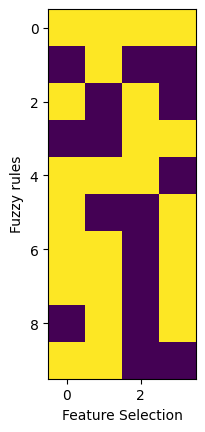

In [26]:
plt.figure()
plt.xlabel("Feature Selection")
plt.ylabel("Fuzzy rules")
plt.imshow(m_exclusion)

In [27]:
#Create a fuzzification function using Gaussian MF
#m_centroids : membershipFunction X features
#X : samples x features
#mf_radius = 1 / (num_mf-1)
def fuzzify(X, m_centroids, mf_radius):
  num_data = X.shape[0]
  num_feats = X.shape[1]
  num_mf = m_centroids.shape[0]

  X_fuzzy = np.zeros((num_data, num_feats, num_mf))

  # fuzzify
  for i in range(num_mf):
    for j in range(num_feats):
      X_fuzzy[:,j,i] = (1 / (mf_radius * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((X[:,j] - m_centroids[i,j]) / mf_radius) ** 2)

  return X_fuzzy


In [28]:
X_fuzzy = fuzzify(X_train,m_centroids,mf_radius)
print(X_fuzzy.shape)
print(np.round(X_fuzzy,3))

(120, 4, 3)
[[[0.404 0.787 0.564]
  [0.524 0.795 0.444]
  [0.249 0.695 0.713]
  [0.293 0.732 0.673]]

 [[0.662 0.74  0.304]
  [0.564 0.787 0.404]
  [0.395 0.784 0.573]
  [0.404 0.787 0.564]]

 [[0.704 0.704 0.259]
  [0.365 0.773 0.602]
  [0.787 0.565 0.149]
  [0.795 0.524 0.127]]

 ...

 [[0.564 0.787 0.404]
  [0.673 0.732 0.293]
  [0.459 0.797 0.509]
  [0.602 0.773 0.365]]

 [[0.134 0.537 0.793]
  [0.259 0.704 0.704]
  [0.123 0.517 0.796]
  [0.173 0.602 0.773]]

 [[0.787 0.564 0.149]
  [0.484 0.798 0.484]
  [0.791 0.549 0.14 ]
  [0.795 0.524 0.127]]]


In [29]:
current_sample = X_fuzzy[0]
print("Fuzzfied input : ")
print(np.round(current_sample,3))

print(" ")
print("Unfuzzified input: ")
print(np.round(X_train[0],3))

Fuzzfied input : 
[[0.404 0.787 0.564]
 [0.524 0.795 0.444]
 [0.249 0.695 0.713]
 [0.293 0.732 0.673]]
 
Unfuzzified input: 
[0.583 0.458 0.763 0.708]


In [65]:
def fuzzy_rule_membership(X_fuzzy,m_rule,m_exclusion):
  # X_fuzzy: samples x features x fuzzy membership
  # m_rule: fuzzyRules x features x fuzzy membership
  # m_exclusion: fuzzyRules x features
  num_data = X_fuzzy.shape[0]
  num_features = X_fuzzy.shape[1]
  num_rules = m_rule.shape[0]
  num_mf = X_fuzzy.shape[2]

  X_fuzzy_rule_membership = np.zeros((num_data,num_rules))

  for i in range(num_rules):
    membership_values = X_fuzzy * m_rule[i]
    aggregated_scores = np.sum(membership_values,axis = 2)
    final_score = np.sum(aggregated_scores * m_exclusion[i],axis = 1)
    X_fuzzy_rule_membership[:,i] = final_score

  return X_fuzzy_rule_membership

In [31]:
X_fuzzy_rule_membership = fuzzy_rule_membership(X_fuzzy,m_rule,m_exclusion)

print(np.round(X_fuzzy_rule_membership,3))

[[5.535 0.444 1.482 ... 2.499 2.492 2.106]
 [5.382 0.404 1.524 ... 2.561 2.542 2.09 ]
 [4.001 0.602 1.269 ... 3.134 2.22  1.843]
 ...
 [5.164 0.293 1.584 ... 2.594 2.472 2.191]
 [5.116 0.704 1.054 ... 2.508 2.252 1.501]
 [3.808 0.484 1.113 ... 3.012 2.244 1.846]]


In [32]:
current_sample = X_fuzzy_rule_membership[0]
print(np.round(current_sample, 3))

# [5.53 0.444 1.482 1.255 2.072 1.295 2.428 2.499 2.492 2.106]
# for the first sample, membership score is 5.535 for 1st fuzzy rule, 0.444 for 2nd fuzzy rule, ...

[5.535 0.444 1.482 1.255 2.072 1.295 2.428 2.499 2.492 2.106]


In [33]:
# compute the discriminant matrix using pseudo-inverse
m_discriminant = np.dot(np.dot(np.dot(X_fuzzy_rule_membership.transpose(), X_fuzzy_rule_membership).transpose(), X_fuzzy_rule_membership.transpose()), y_bin)

# m_discriminant: fuzzy rules x class
# maps the fuzzy rules to the outputs
m_discriminant /= np.nanmax(m_discriminant)
print(np.round(m_discriminant,3))

# How to read:
# 1st row for 1st fuzzy rule; output weights are 0.741 for Class 0, 0.834 for Class 1, 1.00 for Class 2

[[0.741 0.834 1.   ]
 [0.064 0.071 0.085]
 [0.209 0.235 0.282]
 [0.214 0.239 0.286]
 [0.25  0.282 0.339]
 [0.165 0.186 0.223]
 [0.323 0.363 0.436]
 [0.39  0.437 0.523]
 [0.353 0.397 0.476]
 [0.3   0.337 0.405]]


In [34]:
prediction = np.dot(X_fuzzy_rule_membership,m_discriminant)
prediction_label = np.argmax(prediction,axis = 1)

accuracy = np.mean(y_train == prediction_label)
print(np.round(accuracy,3))

0.367


In [95]:
def run_for_x_times(num_times,min_mf,max_mf,min_rules,max_rules):
  best_score = 0
  best_rule = None

  #tqdm is used for showing the percentage while running a for loop
  for i in tqdm(range(num_times)):
      #Randomly choose 2 - max membership function
      num_mf = random.randint(min_mf,max_mf)
      #Randomly choose 2 - max_rules number of fuzzy rules
      num_rules = random.randint(min_rules,max_rules)

      #Settings centroids for Gaussian MF
      m_centroids = np.random.rand(num_mf,num_feat)
      mf_radius = np.random.rand()
      m_rules = np.round(np.random.rand(num_rules,num_feat,num_mf))
      m_exclusion = np.round(np.random.rand(num_rules,num_feat))

      X_fuzzy = fuzzify(X_train,m_centroids,mf_radius)
      X_fuzzy_rule_membership = fuzzy_rule_membership(X_fuzzy,m_rules,m_exclusion)
      m_discriminant = np.dot(np.dot(np.dot(X_fuzzy_rule_membership.transpose(), X_fuzzy_rule_membership).transpose(), X_fuzzy_rule_membership.transpose()), y_bin) # calculate discriminant matrix (i.e. mapping inputs to outputs)
      prediction = np.dot(X_fuzzy_rule_membership, m_discriminant) # compute system prediction
      prediction_label = np.argmax(prediction, axis=1) # convert to labels
      accuracy = np.mean(y_train == prediction_label) # calculate accuracy
      if accuracy > best_score: # keep this configuration if accuracy score is best so far
          best_score = accuracy
          best_rules = (m_rules, m_exclusion, m_discriminant, m_centroids, mf_radius)
          print("Best training accuracy {:.3f}".format(accuracy))

  return best_score,best_rules


In [98]:
best_score = 0
rules = None
settings = [[50000,2,3,2,10],
            [50000,2,3,10,20],
            [50000,2,3,20,50],
            [50000,3,5,2,20],
            [50000,3,5,20,50],
            [50000,3,5,50,80],
            [50000,3,5,80,100]]

for index,setting in enumerate(settings):
  print("Setting ",index," : ",setting)
  score,rule = run_for_x_times(setting[0],setting[1],setting[2],setting[3],setting[4])
  if score > best_score:
    best_score = score
    best_rules = rule
  print("\n--------------------------------------------------------------")

print("\n\nBest Score : ",best_score)
print("m_rule       : ",best_rules[0])
print("m_exclusion  : ",best_rules[1])
print("m_discriminant : ",best_rules[2])
print("m_centroids : ",best_rules[3])
print("mf_radius   : ",best_rules[4])
print("num_mf      : ",m_rule[2])
print("num_rules   : ",m_rule[0])

Setting  0  :  [50000, 2, 3, 2, 10]


  0%|          | 129/50000 [00:00<00:38, 1288.65it/s]

Best training accuracy 0.483
Best training accuracy 0.550
Best training accuracy 0.817


  4%|▍         | 1913/50000 [00:01<00:39, 1226.02it/s]

Best training accuracy 0.867


  5%|▌         | 2745/50000 [00:02<00:26, 1760.55it/s]

Best training accuracy 0.908


 63%|██████▎   | 31611/50000 [00:16<00:07, 2333.40it/s]

Best training accuracy 0.950


100%|██████████| 50000/50000 [00:25<00:00, 1969.86it/s]



--------------------------------------------------------------
Setting  1  :  [50000, 2, 3, 10, 20]


  0%|          | 131/50000 [00:00<00:38, 1306.12it/s]

Best training accuracy 0.308
Best training accuracy 0.367
Best training accuracy 0.383
Best training accuracy 0.558
Best training accuracy 0.592
Best training accuracy 0.617


  1%|          | 518/50000 [00:00<00:39, 1254.50it/s]

Best training accuracy 0.667
Best training accuracy 0.675


  2%|▏         | 1030/50000 [00:00<00:38, 1265.11it/s]

Best training accuracy 0.692


  3%|▎         | 1685/50000 [00:01<00:37, 1280.33it/s]

Best training accuracy 0.717


 15%|█▍        | 7351/50000 [00:05<00:48, 878.76it/s]

Best training accuracy 0.775


 16%|█▌        | 7791/50000 [00:06<00:48, 867.45it/s]

Best training accuracy 0.800


 18%|█▊        | 8908/50000 [00:07<00:51, 792.40it/s]

Best training accuracy 0.892


 53%|█████▎    | 26624/50000 [00:22<00:18, 1298.51it/s]

Best training accuracy 0.917


 57%|█████▋    | 28607/50000 [00:24<00:16, 1266.35it/s]

Best training accuracy 0.925


100%|██████████| 50000/50000 [00:42<00:00, 1189.11it/s]



--------------------------------------------------------------
Setting  2  :  [50000, 2, 3, 20, 50]


  0%|          | 47/50000 [00:00<01:47, 462.79it/s]

Best training accuracy 0.325
Best training accuracy 0.367
Best training accuracy 0.408


  0%|          | 193/50000 [00:00<01:44, 478.33it/s]

Best training accuracy 0.692


  9%|▉         | 4434/50000 [00:11<01:39, 457.46it/s]

Best training accuracy 0.825


 19%|█▉        | 9688/50000 [00:24<01:25, 471.19it/s]

Best training accuracy 0.842


100%|██████████| 50000/50000 [02:06<00:00, 395.29it/s]



--------------------------------------------------------------
Setting  3  :  [50000, 3, 5, 2, 20]


  0%|          | 103/50000 [00:00<00:48, 1019.45it/s]

Best training accuracy 0.367
Best training accuracy 0.608


  1%|          | 515/50000 [00:00<00:39, 1253.34it/s]

Best training accuracy 0.633


  2%|▏         | 804/50000 [00:00<00:35, 1367.62it/s]

Best training accuracy 0.692


 24%|██▍       | 12021/50000 [00:09<00:41, 904.48it/s]

Best training accuracy 0.700


 25%|██▍       | 12381/50000 [00:09<00:43, 868.21it/s]

Best training accuracy 0.708


 36%|███▋      | 18190/50000 [00:14<00:22, 1424.47it/s]

Best training accuracy 0.825


 39%|███▉      | 19480/50000 [00:15<00:21, 1400.90it/s]

Best training accuracy 0.867


100%|██████████| 50000/50000 [00:39<00:00, 1267.06it/s]



--------------------------------------------------------------
Setting  4  :  [50000, 3, 5, 20, 50]


  0%|          | 44/50000 [00:00<01:54, 437.23it/s]

Best training accuracy 0.367


  0%|          | 174/50000 [00:00<02:07, 390.69it/s]

Best training accuracy 0.458
Best training accuracy 0.600


  1%|          | 301/50000 [00:00<02:00, 413.99it/s]

Best training accuracy 0.633


  2%|▏         | 1114/50000 [00:02<02:21, 344.41it/s]

Best training accuracy 0.683


  3%|▎         | 1262/50000 [00:03<02:14, 362.02it/s]

Best training accuracy 0.692


 13%|█▎        | 6430/50000 [00:17<01:44, 417.93it/s]

Best training accuracy 0.750


 58%|█████▊    | 28966/50000 [01:18<00:50, 418.31it/s]

Best training accuracy 0.767


100%|██████████| 50000/50000 [02:15<00:00, 369.12it/s]



--------------------------------------------------------------
Setting  5  :  [50000, 3, 5, 50, 80]


  0%|          | 26/50000 [00:00<03:16, 254.88it/s]

Best training accuracy 0.367
Best training accuracy 0.375


  0%|          | 102/50000 [00:00<03:33, 233.78it/s]

Best training accuracy 0.600


  1%|          | 305/50000 [00:01<03:28, 238.48it/s]

Best training accuracy 0.633
Best training accuracy 0.683


  1%|          | 483/50000 [00:02<03:19, 247.74it/s]

Best training accuracy 0.692


 16%|█▌        | 7940/50000 [00:37<02:45, 253.63it/s]

Best training accuracy 0.817


 42%|████▏     | 20984/50000 [01:36<01:55, 251.73it/s]

Best training accuracy 0.825


 51%|█████     | 25361/50000 [01:57<01:45, 233.13it/s]

Best training accuracy 0.858


 70%|██████▉   | 34797/50000 [02:41<01:00, 250.33it/s]

Best training accuracy 0.867


100%|██████████| 50000/50000 [03:53<00:00, 214.26it/s]



--------------------------------------------------------------
Setting  6  :  [50000, 3, 5, 80, 100]


  0%|          | 19/50000 [00:00<04:32, 183.13it/s]

Best training accuracy 0.367


  0%|          | 155/50000 [00:00<04:29, 185.08it/s]

Best training accuracy 0.658


  0%|          | 233/50000 [00:01<04:26, 186.50it/s]

Best training accuracy 0.667


  2%|▏         | 1146/50000 [00:06<04:24, 184.86it/s]

Best training accuracy 0.692


  4%|▍         | 2246/50000 [00:13<04:13, 188.01it/s]

Best training accuracy 0.725


  7%|▋         | 3722/50000 [00:21<04:12, 183.10it/s]

Best training accuracy 0.758


 42%|████▏     | 20808/50000 [02:05<02:39, 182.57it/s]

Best training accuracy 0.883


100%|██████████| 50000/50000 [05:04<00:00, 164.16it/s]


--------------------------------------------------------------


Best Score :  0.95
m_rule       :  [[[1. 0. 0.]
  [0. 1. 0.]
  [0. 1. 1.]
  [0. 0. 1.]]

 [[0. 0. 0.]
  [0. 1. 0.]
  [1. 0. 0.]
  [0. 1. 0.]]

 [[1. 0. 0.]
  [1. 0. 1.]
  [1. 1. 0.]
  [1. 0. 0.]]

 [[0. 1. 0.]
  [0. 1. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[1. 0. 1.]
  [1. 0. 1.]
  [1. 1. 1.]
  [1. 0. 0.]]

 [[0. 0. 1.]
  [1. 1. 0.]
  [1. 0. 1.]
  [1. 0. 0.]]]
m_exclusion  :  [[0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 1. 1.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [1. 0. 1. 0.]]
m_discriminant :  [[1.74995006e-08 2.11216178e+05 1.73140560e+04]
 [7.27717918e+05 2.20362700e-09 4.44558724e-13]
 [2.40231979e-11 2.37754131e+04 2.32427483e+06]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [2.12822604e-10 3.16807559e+04 2.57301871e+06]
 [2.22754252e-10 3.19010037e+04 2.55287377e+06]]
m_centroids :  [[0.71106114 0.59145785 0.85456631 0.90914631]
 [0.78391672 0.20097888 0.94528261 0.04453104]
 [0.88698065 0.50257757 0.76373031 0.51517994]]
mf_r

In [99]:
X_fuzzy_test = fuzzify(X_test,best_rules[3],best_rules[4])
X_fuzzy_rule_membership_test = fuzzy_rule_membership(X_fuzzy_test,best_rules[0],best_rules[1])

prediction = np.dot(X_fuzzy_rule_membership_test, best_rules[2])
prediction_label = np.argmax(prediction,axis=1)
accuracy = np.mean(prediction_label == y_test)
print(np.round(accuracy,3))

1.0


In [100]:
print("Best number of fuzzy rules: {}".format(num_rules))
print("Best number of input membership functions: {}".format(num_mf))

Best number of fuzzy rules: 10
Best number of input membership functions: 3


In [101]:
# now extract the fuzzy rules
for i in range(num_rules):
    rule = m_rule[i].transpose() * m_exclusion[i]
    rule = rule.transpose()

    if np.nanmax(rule) > 0:
      print("Rule {}: ".format(i))

    # print antecedents for fuzzy rule i
    for j in range(num_feat):
        if np.nanmax(rule[j]) == 0:
            # if no features are selected in this fuzzy rule, then can ignore this fuzzy rule
            pass
        elif np.nanmin(rule[j]) == 1:
            # the value of this feature is irrelevant, i.e. "Don't Care"
            print("For any value of F{} ".format(j))
            break
        else:
            for k in range(num_mf):
                if rule[j,k] > 0:
                    print("IF F{} is MF{} ".format(j, k))

                if (k < num_mf-1):
                    if (rule[j,k+1] > 0) and (rule[j,k] > 0):
                        print("OR ")

        if (j < num_feat-1):
            if (np.nanmax(rule[j+1]) > 0) and (np.nanmax(rule[j]) > 0):
                print("AND ")

    # print consequence for fuzzy rule i
    if np.nanmax(rule) > 0:
      k = np.argmax(m_discriminant[i], axis=0)
      print("THEN class is {}".format(k))
      print(" ")

Rule 0: 
IF F2 is MF1 
OR 
IF F2 is MF2 
THEN class is 0
 
Rule 1: 
IF F0 is MF0 
OR 
IF F0 is MF1 
For any value of F2 
THEN class is 0
 
Rule 2: 
IF F0 is MF1 
THEN class is 2
 
Rule 4: 
IF F0 is MF2 
AND 
IF F1 is MF1 
AND 
IF F2 is MF2 
THEN class is 0
 
Rule 5: 
IF F0 is MF2 
THEN class is 1
 
Rule 6: 
For any value of F0 
THEN class is 1
 
Rule 8: 
IF F0 is MF0 
IF F0 is MF2 
THEN class is 1
 
Rule 9: 
IF F2 is MF0 
IF F2 is MF2 
THEN class is 2
 
